In [ ]:
!pip install pygame
!pip install scikit_learn==0.23.2

     |████████████████████████████████| 11.5MB 8.3MB/s 
     |████████████████████████████████| 6.8MB 8.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import pygame
import time
import numpy as np
#from random import randrange
#from random import uniform
import random
import time
import copy
from sklearn.preprocessing import normalize
import os
import pickle
import concurrent.futures
import math
from google.colab import drive
drive.mount('/content/gdrive')

pygame 2.0.0 (SDL 2.0.12, python 3.6.9)
Hello from the pygame community. https://www.pygame.org/contribute.html
Mounted at /content/gdrive


In [ ]:
# Import pygame.locals for easier access to key coordinates

from pygame.locals import (
    K_UP,
    K_DOWN,
    K_LEFT,
    K_RIGHT,
    K_w,
    K_ESCAPE,
    KEYDOWN,
    QUIT,
)


In [ ]:
"""
Given a position in pixel, discovery a new position multiple of PIXEL_DIM (worm dimensions)
"""
def roundPosition(pos):
	return int(pos/PIXEL_DIM)


def pixel2position(pix):
	return pix*PIXEL_DIM

def position2pixel(pos):
	return pos/PIXEL_DIM

"""
 Draw a square 
 @param size_x
 @param size_y
 @param x
 @param y
 """
def drawSquare(size_x, size_y, x, y, color):
	# Create a surface and pass in a tuple containing its length and width
	surf = pygame.Surface((size_x, size_y))
	# Give the surface a color to separate it from the background
	
	if color == 'red':
		surf.fill((255, 0, 0))
	elif color == 'black':
		surf.fill((0, 0, 0))

	rect = surf.get_rect()

	# This line says "Draw surf onto the screen at this cordinates"
	screen.blit(surf, (x, y))
	pygame.display.flip()

def drawWorm(i):

	global worm_set

	for j in range(len(worm_set[i])-1):
		drawSquare(PIXEL_DIM, PIXEL_DIM, worm_set[i][j][0]*PIXEL_DIM, worm_set[i][j][1]*PIXEL_DIM, 'black')

def drawFood():

	global food
	drawSquare(PIXEL_DIM, PIXEL_DIM, food[0]*PIXEL_DIM, food[1]*PIXEL_DIM, 'red')

def drawScore(i):
	myfont = pygame.font.SysFont('Comic Sans MS', 30)
	textsurface = myfont.render('Score: ' + str(score_set[i]), False, (0, 0, 0))
	screen.blit(textsurface,(10,10))
	pygame.display.flip()



In [ ]:
def hitWall(i):

	if (worm_set[i][0][0] < 0 or
		worm_set[i][0][0] >= roundPosition(SCREEN_WIDTH) or
		worm_set[i][0][1] < 0 or
		worm_set[i][0][1] >= roundPosition(SCREEN_HEIGHT) ):

		return 1
	else:
		return 0

In [ ]:



""" 
Loop over all points of worm's body and change it position
 @Param movement The movement of head	
 @return true if the worm eats the food
 @return false if the worm not eat the food
"""
def movementWormBody(movement, i):

	# Define the first point position	
	if (movement == 'left'):
		newPointX = worm_set[i][0][0] - 1
		newPointY = worm_set[i][0][1]

	elif (movement == 'up'):
		newPointX = worm_set[i][0][0]
		newPointY = worm_set[i][0][1] - 1

	elif (movement == 'right'):
		newPointX = worm_set[i][0][0] + 1
		newPointY = worm_set[i][0][1]			

	elif (movement == 'down'):
		newPointX = worm_set[i][0][0]
		newPointY = worm_set[i][0][1] + 1

	
	if(newPointX == food[0] and newPointY == food[1]):
		#worm_set[i].splice(0, 0, [food[0], food[1]])
		worm_set[i].insert(0, [food[0], food[1]])
		return 1
	

	formerPoint = [worm_set[i][0][0], worm_set[i][0][1]]
	worm_set[i][0][0] = newPointX
	worm_set[i][0][1] = newPointY			
	

	# In worm body, change the second point position to first point position, the third point position to second point position, and so on
	for j in range(1, len(worm_set[i])-1): # For each worm's body segment, in the last position of array
	#for (var j = 1; j<worm_set[i].length ; j++):
		aux = [worm_set[i][j][0], worm_set[i][j][1]]
		worm_set[i][j][0] = formerPoint[0]
		worm_set[i][j][1] = formerPoint[1]

		formerPoint = aux
	

In [ ]:

"""
	Start new worms with random brains
"""
def newGame():
	global worm_set
	global score_set
	global last_position
	global individuals
	global current_individual
	global initial_food_position
	global initial_snake_position
	global food

	worm_set = []
	score_set = []
	initial_snake_position = []
	initial_food_position = []
	for i in range(0, individuals):

	#for(var i = 0 ; i < individuals ; i++):

		# Set initial worm value			
		
		initial_point = getRandomVector()

		worm = []
		worm.append([copy.deepcopy(initial_point[0]), copy.deepcopy(initial_point[1])])
		initial_snake_position.append([copy.deepcopy(initial_point[0]), copy.deepcopy(initial_point[1])])

		worm.append("alive")
		worm_set.append(copy.deepcopy(worm))

		#newFoodPosition(i)	# newFoodPosition alters the global 'food'
		initial_food_position.append(time.time())

		last_position.append("qualquer_lado")

		# Set score to 0
		#score = -10
		zeroScore()


	current_individual = 0
	



In [ ]:
def zeroScore():
	global score_set
	score_set = []
	for i in range(individuals):
		score_set.append(0)

In [ ]:
def update(movement, i):

	global current_individual
	global wormLoop
	global food
	global current_snake_food

	if movement == 'right':
		if last_position[i] != 'left':
			movement = 'right'	
		else:
			movement = "left"
	
	if movement == 'up':
		if last_position[i] != 'down':
			movement = 'up'
		else:
			movement = "down"
		
	if movement == 'left':
		if(last_position[i] != 'right'):
			movement = 'left'
		else:
			movement = "right"

	if movement == 'down':
		if last_position[i] != 'up':
			movement = 'down'
		else:
			movement = "up"

	last_position[i] = movement
	
	

	# Moviment the worm
	eatTheFood = movementWormBody(movement, i)
 
	if(eatTheFood):
		newFoodPosition(current_individual)
		current_snake_food.append(copy.deepcopy(food))
		updateScore(i)
		wormLoop = 0

	
	if ( hitWall(i) == 1):
		worm_set[i][len(worm_set[i])-1] = 'dead'
		return 'dead'	

	# Verify if worm is dead by headitting on the only body
	if(stuckTheBody(i)):
		worm_set[i][len(worm_set[i])-1] = "dead"
		return 'dead'


In [ ]:
# Get a random vector containing a valid position in screen
def getRandomVector():

	return [roundPosition(random.randrange(SCREEN_WIDTH)), 
            roundPosition(random.randrange(SCREEN_HEIGHT))]	


In [ ]:
# TODO: Better way to get valid food position
def newFoodPosition(i):
		global food
		global worm_set
		global replay
		global foods
		global currentFood

		# Set initial food value
		flag = 1
		while (flag):
			initial_point = getRandomVector()

			# If the food is in the same place of some point of worm body, cast to the next superior int
			flag = 0
		#	for h in range(len(worm_set)):
			worm_ = worm_set[i]
			for j in range(len(worm_)):
				body = [worm_[j][0], worm_[j][1]]
				if initial_point[0] == body[0] and initial_point[1] == body[1]:
					flag = 1
					break

			if flag == 0:
				break

		if replay == 1:
			#print("Load food")
			food = foods[currentFood]
			currentFood += 1
		else:
			food = copy.deepcopy(initial_point)
	
# Verify if the head exists in the same coordinates of some point of the body
# @return true if Worm hit your own body. His dead :/
# @return false if Worm NOT hit your own body. His alive :)

In [ ]:
def stuckTheBody(i):
	head = [worm_set[i][0][0], worm_set[i][0][1]]

	# Start in the second position
	for j in range(1, len(worm_set[i])):
	#for (var j = 1 ; j < worm_set[i].length ; j++){
		body = [worm_set[i][j][0], worm_set[i][j][1]]
		if head[0] == body[0] and head[1] == body[1]:
			return True
		
	

	return False
	


In [ ]:

def updateScore(i):
	score_set[i] += 1000

def updateScoreAlive(i):
	score_set[i] += 1

def draw(i):
	# Fill the screen with white
	screen.fill((255, 255, 255))

	drawWorm(i)
	drawFood()
	drawScore(i)


In [ ]:
def p1(head, point):
	# tng in infinity. Thus, verify if x coordinates is same
	m = -1
	suposto_y = m*point[0] - m*(head[0] + 2) + (head[1] - 2)

	if suposto_y == point[1] and point[1] < head[1] :

		oi = np.linalg.norm(np.asarray(head)-np.asarray(point))				

		if oi == 0:
			return 1

		return 1/oi

	else:
		return 0
	
""" 
	Perpendicular line above worm head
      -------
	  -------  
	  ---*---
      ---.---
      ---.---	
"""

' \n\tPerpendicular line above worm head\n      -------\n\t  -------  \n\t  ---*---\n      ---.---\n      ---.---\t\n'

In [ ]:
def p2(head, point):
	# tng in infinity. Thus, just verify if x coordinates is same
	if head[0] == point[0] and point[1] > head[1]:
		oi = np.linalg.norm(np.asarray(head)-np.asarray(point))		
		
		if oi == 0:
			return 1		
		return 1/oi
	else:
		return 0
	

In [ ]:
def p3(head, point):
	# tng in infinity. Thus, verify if x coordinates is same
	m = 1

	suposto_y = m*point[0] - m*(head[0] - 2) + (head[1] - 2)	
	if suposto_y == point[1] and point[1] > head[1] :
		oi = np.linalg.norm(np.asarray(head)-np.asarray(point))
		
		if oi == 0:
			return 1
		return 1/oi
	else:
		return 0




In [ ]:
def p4(head, point):
	# tng in infinity. Thus, just verify if x coordinates is same
	if head[1] == point[1] and point[0] < head[0]:
		oi = np.linalg.norm(np.asarray(head)-np.asarray(point))		
		
		if oi == 0:
			return 1
		return 1/oi
	else:
		return 0



In [ ]:
def p5(head, point):
	# tng in infinity. Thus, verify if x coordinates is same
	m = -1
	suposto_y = m*point[0] - m*(head[0] + 2) + (head[1] - 2)	

	if suposto_y == point[1] and point[1] > head[1] :
		oi = np.linalg.norm(np.asarray(head)-np.asarray(point))
		
		if oi == 0:
			return 1
		return 1/oi
	else:
		return 0



In [ ]:
def p6(head, point):
	# tng in infinity. Thus, just verify if x coordinates is same
	if head[0] == point[0] and point[1] < head[1]:
		oi = np.linalg.norm(np.asarray(head)-np.asarray(point))		
		
		if oi == 0:
			return 1
		return 1/oi
	else:
		return 0


In [ ]:
def p7(head, point):
	# tng in infinity. Thus, verify if x coordinates is same
	m = 1
	suposto_y = m*point[0] - m*(head[0] - 2) + (head[1] - 2)	

	if suposto_y == point[1] and point[1] < head[1] :
		oi = np.linalg.norm(np.asarray(head)-np.asarray(point))

		if oi == 0:
			return 1
		return 1/oi
	else:
		return 0



In [ ]:
def p8(head, point):
	# tng in infinity. Thus, just verify if x coordinates is same
	if head[1] == point[1] and point[0] > head[0]:
		oi = np.linalg.norm(np.asarray(head)-np.asarray(point))				
		
		if oi == 0:
			return 1
		return 1/oi
	else:
		return 0



In [ ]:
def border1(head):

	# First verif if the line hit top border
	m = -1 # 45 degrees
	head_pixel_0 = head[0]
	head_pixel_1 = head[1]
	game_area_width_ = SCREEN_WIDTH
	game_area_height_ = SCREEN_HEIGHT
	#console.log(cols)
	#console.log(rows)
	suposto_x = (0 + m*(head_pixel_0 + 2) - (head_pixel_1 - 2))/m

	ponto = []
	if suposto_x < game_area_width_:
		ponto = [suposto_x, 0]
	else:
		y = (m*game_area_width_) + (-m*(suposto_x)) + (0)
		ponto = [game_area_width_, y]
	
	#drawSquare(5,5, ponto[0]-10, ponto[1]+10)
	#ctx.fillStyle = "blue";
	#ctx.fillRect((ponto[0]*pixel_worm_size)-10, ponto[1]*pixel_worm_size, 10, 10);

	oi = np.linalg.norm(np.asarray(head)-np.asarray(ponto))

	if oi == 0:
		return 1
	return 1/oi



In [ ]:
#
#	Diagonal line from head to up border OR right border
#
def border3(head):

	# First verif if the line hit top border
	m = 1 # 45 degrees
	head_pixel_0 = head[0]
	head_pixel_1 = head[1]
	game_area_width_ = roundPosition(SCREEN_WIDTH)
	game_area_height_ = roundPosition(SCREEN_HEIGHT)
	#console.log(cols)
	#console.log(rows)
	suposto_x = (0 + m*(head_pixel_0 - 2) - (head_pixel_1 - 2))/m

	ponto = []
	if suposto_x > 0:
		ponto = [suposto_x, 0]	
	else:
		y = (m*0) + (-m*(suposto_x)) + (0)
		ponto = [0, y]
	
	#drawSquare(5,5, ponto[0]+10, ponto[1]+10)
	#ctx.fillStyle = "blue";
	#ctx.fillRect((ponto[0]*pixel_worm_size)-10, ponto[1]*pixel_worm_size, 10, 10);

	oi = np.linalg.norm(np.asarray(head)-np.asarray(ponto))
	if oi == 0:
		return 1	
	return 1/oi

	

In [ ]:
def border5(head):

	# First verif if the line hit top border
	m = -1 # 45 degrees
	head_pixel_0 = head[0]
	head_pixel_1 = head[1]
	game_area_width_ = roundPosition(SCREEN_WIDTH)
	game_area_height_ = roundPosition(SCREEN_HEIGHT)
	suposto_x = (game_area_height_ + m*(head_pixel_0 - 2) - (head_pixel_1 + 2))/m
	
	ponto = []
	if(suposto_x > 0):
		ponto = [suposto_x, game_area_height_]
	else:
		y = (m*0) + (-m*(suposto_x)) + (game_area_height_)
		ponto = [0, y]
	
	#ctx.fillStyle = "blue";
	#ctx.fillRect(ponto[0]*pixel_worm_size, (ponto[1]*pixel_worm_size)-10, 10, 10);	
	#drawSquare(5,5, ponto[0]+10, ponto[1]-10)
	oi = np.linalg.norm(np.asarray(head)-np.asarray(ponto))
	if oi == 0:
		return 1
	return 1/oi



In [ ]:
def border7(head):
	# First verif if the line hit top border

	m = 1 # 45 degrees
	head_pixel_0 = head[0]
	head_pixel_1 = head[1]
	game_area_width_ = roundPosition(SCREEN_WIDTH)
	game_area_height_ = roundPosition(SCREEN_HEIGHT)
	suposto_x = (game_area_height_ + m*(head_pixel_0 - 2) - (head_pixel_1 - 2))/m

	ponto = []
	if suposto_x < game_area_width_:	
		ponto = [suposto_x, game_area_height_]
	else:
		y = (m*game_area_width_) + (-m*(suposto_x)) + (game_area_height_)
		ponto = [game_area_width_, y]			
	
	#drawSquare(5,5, ponto[0]-10, ponto[1]-10)
	oi = np.linalg.norm(np.asarray(head)-np.asarray(ponto))

	if oi == 0:
		return 1
	return 1/oi
	

In [ ]:
"""
* Vertical line, from head to up border
"""
def border2(head):
	ponto = [head[0], 0]		
	# ctx.fillStyle = "blue";
	oi = np.linalg.norm(np.asarray(head)-np.asarray(ponto))
	# drawSquare(5,5, ponto[0], ponto[1])
	# ctx.fillRect(ponto[0]*pixel_worm_size, ponto[1]*pixel_worm_size, 10, 10);	

	if oi == 0:
		return 1
	return 1/oi



In [ ]:
"""
* Horizontal line, from head to left border
"""
def border4(head):
	ponto = [0, head[1]]
	#ctx.fillStyle = "blue";
	#console.log(ponto)
	oi = np.linalg.norm(np.asarray(head)-np.asarray(ponto))
	#drawSquare(5,5, ponto[0], ponto[1])
	#ctx.fillRect(ponto[0]*pixel_worm_size, ponto[1]*pixel_worm_size, 10, 10);		

	if oi == 0:
		return 1	
	return 1/oi



In [ ]:
"""
* Vertical line, from head to down border
"""
def border6(head):
	game_area_height_ = roundPosition(SCREEN_HEIGHT)
	ponto = [head[0], game_area_height_]
	#ctx.fillStyle = "blue";
	#console.log(ponto)
	oi = np.linalg.norm(np.asarray(head)-np.asarray(ponto))
	#drawSquare(5,5, ponto[0]-10, ponto[1]-10)
	#ctx.fillRect(ponto[0]*pixel_worm_size, (ponto[1]*pixel_worm_size)-10, 10, 10);			
	#ctx.fillRect(ponto[0]*pixel_worm_size, ponto[1]*pixel_worm_size, 10, 10);	

	if oi == 0:
		return 1
	return 1/oi


In [ ]:
"""
* Horizontal line, from head to right border
"""	
def border8(head):
	game_area_width_ = roundPosition(SCREEN_WIDTH)
	ponto = [game_area_width_, head[1]]
	#ctx.fillStyle = "blue";
	#console.log(ponto)
	oi = np.linalg.norm(np.asarray(head)-np.asarray(ponto))
	#drawSquare(5,5, ponto[0]-10, ponto[1]-10)

	#ctx.fillRect((ponto[0]*pixel_worm_size)-10, ponto[1]*pixel_worm_size, 10, 10);			
	#ctx.fillRect(ponto[0]*pixel_worm_size, ponto[1]*pixel_worm_size, 10, 10);		

	if oi == 0:
		return 1
	return 1/oi
	

In [ ]:
"""
*	Diagonal line from head (up-right). Verify if hit worm body
"""
def border1_body(worm):


	# First verif if the line hit top border
	m = -1 # 45 degrees
	init_x = worm[0][0]
	init_y = worm[0][1]


	# The worm ywt has no body
	if (len(worm) == 1):
		return 0
	
	# Iterate over worm body and verify if belongs to line
	for i in range(len(worm)-1):
	#for (i = 1 ; i < worm.length ; i++){
		worm_x = worm[i][0]
		worm_y = worm[i][1]
		y = -m*(init_x + 2) + m*worm_x + (init_y - 2)

		if worm_y == y and worm_x > init_x and worm_y < init_y:
			oi = np.linalg.norm(np.asarray([init_x, init_y])-np.asarray([worm_x, worm_y]))

			if oi == 0:
				return 1
			return 1/oi
			#return dist([init_x, init_y], [worm_x, worm_y])
		
	
	return 0;

In [ ]:
def border2_body(worm):


	# First verif if the line hit top border
	m = -1 # 45 degrees
	init_x = worm[0][0]
	init_y = worm[0][1]


	# The worm ywt has no body
	if (len(worm) == 1):
		return 0
	
	# Iterate over worm body and verify if belongs to line
	for i in range(len(worm)-1):
	#for (i = 1 ; i < worm.length ; i++){
		worm_x = worm[i][0]
		worm_y = worm[i][1]

		if worm_x == init_x and worm_y < init_y:
			oi = np.linalg.norm(np.asarray([init_x, init_y])-np.asarray([worm_x, worm_y]))

			if oi == 0:
				return 1
			return 1/oi
	
		
	
	return 0;	


In [ ]:
""" 
      .------
	  -.-----  
	  ---*---
      -------
      -------	
"""
def border3_body(worm):


	# First verif if the line hit top border
	m = 1 # 45 degrees
	init_x = worm[0][0]
	init_y = worm[0][1]


	# The worm ywt has no body
	if (len(worm) == 1):
		return 0
	
	# Iterate over worm body and verify if belongs to line
	for i in range(len(worm)-1):
	#for (i = 1 ; i < worm.length ; i++){
		worm_x = worm[i][0]
		worm_y = worm[i][1]
		y = -m*(init_x - 2) + m*worm_x + (init_y - 2)

		if worm_y == y and worm_x < init_x and worm_y < init_y:
			oi = np.linalg.norm(np.asarray([init_x, init_y])-np.asarray([worm_x, worm_y]))

			if oi == 0:
				return 1
			return 1/oi
			#return dist([init_x, init_y], [worm_x, worm_y])
		
	
	return 0;


In [ ]:
def border4_body(worm):


	# First verif if the line hit top border
	m = -1 # 45 degrees
	init_x = worm[0][0]
	init_y = worm[0][1]


	# The worm ywt has no body
	if (len(worm) == 1):
		return 0
	
	# Iterate over worm body and verify if belongs to line
	for i in range(len(worm)-1):
	#for (i = 1 ; i < worm.length ; i++){
		worm_x = worm[i][0]
		worm_y = worm[i][1]

		if worm_y == init_y and worm_x < init_x:
			oi = np.linalg.norm(np.asarray([init_x, init_y])-np.asarray([worm_x, worm_y]))

			if oi == 0:
				return 1
			
			return 1/oi
	
		
	
	return 0;	

In [ ]:
def border5_body(worm):


	# First verif if the line hit top border
	m = -1 # 45 degrees
	init_x = worm[0][0]
	init_y = worm[0][1]


	# The worm ywt has no body
	if (len(worm) == 1):
		return 0
	
	# Iterate over worm body and verify if belongs to line
	for i in range(len(worm)-1):
	#for (i = 1 ; i < worm.length ; i++){
		worm_x = worm[i][0]
		worm_y = worm[i][1]
		y = -m*(init_x - 2) + m*worm_x + (init_y + 2)

		if worm_y == y and worm_x < init_x and worm_y > init_y:
			oi = np.linalg.norm(np.asarray([init_x, init_y])-np.asarray([worm_x, worm_y]))
			
			if oi == 0:
				return 1
			return 1/oi
			#return dist([init_x, init_y], [worm_x, worm_y])
		
	
	return 0;


In [ ]:
def border6_body(worm):


	# First verif if the line hit top border
	m = -1 # 45 degrees
	init_x = worm[0][0]
	init_y = worm[0][1]


	# The worm ywt has no body
	if (len(worm) == 1):
		return 0
	
	# Iterate over worm body and verify if belongs to line
	for i in range(len(worm)-1):
	#for (i = 1 ; i < worm.length ; i++){
		worm_x = worm[i][0]
		worm_y = worm[i][1]

		if worm_x == init_x and worm_y > init_y:
			oi = np.linalg.norm(np.asarray([init_x, init_y])-np.asarray([worm_x, worm_y]))
			
			if oi == 0:
				return 1
			return 1/oi
	
		
	
	return 0;		


In [ ]:
def border7_body(worm):


	# First verif if the line hit top border
	m = 1 # 45 degrees
	init_x = worm[0][0]
	init_y = worm[0][1]


	# The worm ywt has no body
	if (len(worm) == 1):
		return 0
	
	# Iterate over worm body and verify if belongs to line
	for i in range(len(worm)-1):
	#for (i = 1 ; i < worm.length ; i++){
		worm_x = worm[i][0]
		worm_y = worm[i][1]
		y = -m*(init_x + 2) + m*worm_x + (init_y + 2)

		if worm_y == y and worm_x > init_x and worm_y > init_y:
			oi = np.linalg.norm(np.asarray([init_x, init_y])-np.asarray([worm_x, worm_y]))
			
			if oi == 0:
				return 1
			return 1/oi
			#return dist([init_x, init_y], [worm_x, worm_y])
		
	
	return 0;

In [ ]:
def border8_body(worm):


	# First verif if the line hit top border
	m = -1 # 45 degrees
	init_x = worm[0][0]
	init_y = worm[0][1]


	# The worm ywt has no body
	if (len(worm) == 1):
		return 0
	
	# Iterate over worm body and verify if belongs to line
	for i in range(len(worm)-1):
	#for (i = 1 ; i < worm.length ; i++){
		worm_x = worm[i][0]
		worm_y = worm[i][1]

		if worm_y == init_y and worm_x > init_x:
			oi = np.linalg.norm(np.asarray([init_x, init_y])-np.asarray([worm_x, worm_y]))

			if oi == 0:
				return 1
			return 1/oi
	
		
	
	return 0;	

In [ ]:
def normalize_values(input):

	#norm1 = input / np.linalg.norm(input)
	norm1 = 2.*(input - np.min(input))/np.ptp(input)-1

		
	return norm1

def sigmoid(mat, bias):

	result = []	
	for i in range(len(mat)):
	#for(i ; i < mat.length ; i++){
		result.append(1 / (1 + math.exp(-mat[i] + bias)))
	
	return result

In [ ]:

"""
*	Receie a matrix, apply reLU in every element of this matrix
*	@return the matrix applied to reLU
"""
def relu(mat, bias):

	result = []	
	sum = 0
	for i in range(len(mat)):
	#for(i ; i < mat.length ; i++){
		result.append(np.amax([0, mat[i] + bias ] ))
	
	return result

In [ ]:

def neural_network_inference(input, i):	


	#print(input)

	#input = normalize_values(input)
	#print(input)

	layer1 = np.matmul(input, brain_set[i][0])	
	layer1 = relu(layer1, brain_set[i][3])

	#print(layer1)

	layer2 = np.matmul(layer1, brain_set[i][1])
	layer2 = relu(layer2, brain_set[i][4])

	#print(layer2)

	output = np.matmul(layer2, brain_set[i][2])
	output = sigmoid(output, brain_set[i][5])

	#print(output)

	#print(output)

	return output

In [ ]:

# 3 layers, 1 input layer (24 neurons), 1 hidden layer (16 neurons) and 1 output lauer (4 neurons)
def initialize_neural_network(l1, l2, l3):


	# Init layer l1
	for i in range(INPUT_NEURON):
	#for (i = 0 ; i < input_neuron ; i++){
		l1.append([])
		for j in range(HIDDEN_NEURON1):
		#for (j = 0 ; j < hidden_neuron ; j++){
			l1[i].append(random.uniform(-1,1))
		
	
	# Init layer l2
	for i in range(HIDDEN_NEURON1):
	#for (i = 0 ; i < hidden_neuron ; i++){
		l2.append([])
		for j in range(HIDDEN_NEURON2):
		#for (j = 0 ; j < hidden_neuron2 ; j++){
			l2[i].append(random.uniform(-1,1))
		

	# Init layer l3
	for i in range(HIDDEN_NEURON2):
	#for (i = 0 ; i < hidden_neuron2 ; i++){
		l3.append([])
		for j in range(OUTPUT_NEURON):
		#for (j = 0 ; j < output_neuron ; j++){
			l3[i].append(random.uniform(-1,1))


		


In [ ]:

def neural_network():

	global brain_set

	# Initialize brains with random values
	for i in range(individuals):
	#for (var i = 0 ; i < individuals ; i++){
		l1 = []
		l2 = []
		l3 = []

		initialize_neural_network(l1, l2, l3)

		b1 = random.uniform(-1,1)
		b2 = random.uniform(-1,1)
		b3 = random.uniform(-1,1)

		brain = []
		brain.append(l1)
		brain.append(l2)
		brain.append(l3)
		brain.append(b1)
		brain.append(b2)
		brain.append(b3)

		brain_set.append(brain)

In [ ]:

def saveMostApt(index_fittest1,score_most_fittest):
	global currentGeneration
	global best_snake_brain
	global best_snake_food
	global best_snake_head

	np.save('/content/gdrive/MyDrive/snake/checkpoints/'+str(currentGeneration)+'/brain_'+str(score_most_fittest)+'.npy', np.asarray(best_snake_brain))
	np.save('/content/gdrive/MyDrive/snake/checkpoints/'+str(currentGeneration)+'/food', np.asarray(best_snake_food))
	np.save('/content/gdrive/MyDrive/snake/checkpoints/'+str(currentGeneration)+'/head', np.asarray(best_snake_head))	



In [ ]:

def replicate():
	
	global currentGeneration
	global current_snake_score
	global best_snake_brain
	global best_snake_head
	global best_snake_food
	global best_snake_score


	# Select 5 most fittest individuals, them, make a random selection for crossing over
	most_fittest_array = []

	index_fittest1 = np.argmax(score_set)

	file = open('/content/gdrive/MyDrive/snake/checkpoints/scores.txt', 'a')
	score_most_fittest = score_set[index_fittest1]
	file.write(str(score_most_fittest)+'\n')
	file.close()

	most_apt_individual = copy.deepcopy(brain_set[index_fittest1])

	print("Score do indivíduo mais apto da geração " + str(currentGeneration) + ": " + str(score_set[index_fittest1]))

	score_set[index_fittest1] = float('-Inf')

	index_fittest2 = np.argmax(score_set)
	score_set[index_fittest2] = float('-Inf')

	index_fittest3 = np.argmax(score_set)
	score_set[index_fittest3] = float('-Inf')


	most_fittest_array.append(index_fittest1)
	most_fittest_array.append(index_fittest2)
	most_fittest_array.append(index_fittest3)

	# Clone the most apt in the new generation
	brain_set[0] = most_apt_individual

	# Salva o mais apto
	saveMostApt(index_fittest1, score_most_fittest)
	currentGeneration += 1


	weightsLen = INPUT_NEURON*HIDDEN_NEURON1 + HIDDEN_NEURON1*HIDDEN_NEURON2 + HIDDEN_NEURON2*OUTPUT_NEURON + 3
	crossoverPoint = random.randrange(weightsLen)

	"""
	counter = 0
	# For each layer
	for i in range(3):
		for j in range(len(brain_set[most_fitted_individual][i])):
			for k in range(len(brain_set[most_fitted_individual][i][j])):
				if counter > weightsLen:
					brain_set[most_fitted_individual][i][j][k] = brain_set[most_fitted_individual2][i][j][k]
					counter += 1

	print("Crossover point: ")
	print(crossoverPoint)
	print(brain_set[most_fitted_individual])					
	print(brain_set[most_fitted_individua2])					
	"""	




	for i in range(1, individuals):	
		crossoverPoint = random.randrange(weightsLen)
		most_fittest_array_aux	= []
		most_fittest_array_aux = copy.deepcopy(most_fittest_array)
		index = random.randrange(3)
		most_fitted_individual = copy.deepcopy(brain_set[most_fittest_array_aux[index]])
		del most_fittest_array_aux[index]
		index2 = random.randrange(2)
		most_fitted_individual2 = copy.deepcopy(brain_set[most_fittest_array_aux[index2]])

		# Count the genes for single point crossingover. We consider the entire NN as a big single cromossomos
		counter = 0
		for j in range(INPUT_NEURON):

			for k in range (HIDDEN_NEURON1):
				prob = random.uniform(0, 100)

				if prob < MUTATION_PROBABILITY:
					brain_set[i][0][j][k] += np.random.normal(0, 1/6)
					#brain_set[i][0][j][k] = random.uniform(-1,1)


					if brain_set[i][0][j][k] > 1:
						brain_set[i][0][j][k] = 1
					if brain_set[i][0][j][k] < -1:
						brain_set[i][0][j][k] = -1						

				else:
					if counter > crossoverPoint:
						brain_set[i][0][j][k] = copy.deepcopy(most_fitted_individual2[0][j][k])
					else:
						brain_set[i][0][j][k] = copy.deepcopy(most_fitted_individual[0][j][k])

				counter += 1

			# Crossover the bias
			if counter > crossoverPoint:
				brain_set[i][3] = copy.deepcopy(most_fitted_individual2[3])
			else:
				brain_set[i][3] = copy.deepcopy(most_fitted_individual[3])

			counter += 1

				

		for j in range(HIDDEN_NEURON1):
			for k in range (HIDDEN_NEURON2):
				prob = random.uniform(0, 100)


				if prob < MUTATION_PROBABILITY:
					brain_set[i][1][j][k] += np.random.normal(0, 1/6)
					#brain_set[i][1][j][k] = random.uniform(-1,1)

					if brain_set[i][1][j][k] > 1:
						brain_set[i][1][j][k] = 1
					if brain_set[i][1][j][k] < -1:
						brain_set[i][1][j][k] = -1	

				else:
					if counter > crossoverPoint:
						brain_set[i][1][j][k] = copy.deepcopy(most_fitted_individual2[1][j][k])
					else:
						brain_set[i][1][j][k] = copy.deepcopy(most_fitted_individual[1][j][k])

				counter += 1

			# Crossover the bias
			if counter > crossoverPoint:
				brain_set[i][4] = copy.deepcopy(most_fitted_individual2[4])
			else:
				brain_set[i][4] = copy.deepcopy(most_fitted_individual[4])

			counter += 1
				

		for j in range(HIDDEN_NEURON2):
			for k in range (OUTPUT_NEURON):
				
				prob = random.uniform(0, 100)

				if prob < MUTATION_PROBABILITY:
					brain_set[i][2][j][k] += np.random.normal(0, 1/6)
					#brain_set[i][2][j][k] = random.uniform(-1,1)

					if brain_set[i][2][j][k] > 1:
						brain_set[i][2][j][k] = 1
					if brain_set[i][2][j][k] < -1:
						brain_set[i][2][j][k] = -1	

				else:
					if counter > crossoverPoint:
						brain_set[i][2][j][k] = copy.deepcopy(most_fitted_individual2[2][j][k])
					else:
						brain_set[i][2][j][k] = copy.deepcopy(most_fitted_individual[2][j][k])

				counter += 1

			# Crossover the bias
			if counter > crossoverPoint:
				brain_set[i][5] = copy.deepcopy(most_fitted_individual2[5])
			else:
				brain_set[i][5] = copy.deepcopy(most_fitted_individual[5])


		prob = random.uniform(0, 100)
		if prob < MUTATION_PROBABILITY:
			brain_set[i][3] += np.random.normal(0, 1/6)
			#brain_set[i][3] = random.uniform(-1,1)

			if brain_set[i][3] > 1:
				brain_set[i][3] = 1
			if brain_set[i][3] < -1:
				brain_set[i][3] = -1				
		else:
			brain_set[i][3] = copy.deepcopy(most_fitted_individual[3])
		
		prob = random.uniform(0, 100)
		if prob < MUTATION_PROBABILITY:
			brain_set[i][4] += np.random.normal(0, 1/6)
			#brain_set[i][4] = random.uniform(-1,1)

			if brain_set[i][4] > 1:
				brain_set[i][4] = 1
			if brain_set[i][4] < -1:
				brain_set[i][4] = -1	

		else:
			brain_set[i][4] = copy.deepcopy(most_fitted_individual[4])

		prob = random.uniform(0, 100)		
		if prob < MUTATION_PROBABILITY:
			brain_set[i][5] += np.random.normal(0, 1/6)
			#brain_set[i][5] = random.uniform(-1,1)

			if brain_set[i][5] > 1:
				brain_set[i][5] = 1
			if brain_set[i][5] < -1:
				brain_set[i][5] = -1	

		else:
			brain_set[i][5] = copy.deepcopy(most_fitted_individual[5])


In [ ]:


def loadIndividuals():
	global brain_set

	# Inicia com indivíduos randômicos

	# Carrega os indivíduos melhores salvos. Provavelmente eles irão sobreviver no meio da cambada de indivíduos mais novos
	path1 = "/content/gdrive/MyDrive/snake/checkpoints/224/brain_43471.npy"
	path2 = "/content/gdrive/MyDrive/snake/checkpoints/223/brain_27887.npy"
	path3 = "/content/gdrive/MyDrive/snake/checkpoints/222/brain_26250.npy"


	file1 = np.load(path1, allow_pickle=True).tolist()
	file2 = np.load(path2, allow_pickle=True).tolist()
	file3 = np.load(path3, allow_pickle=True).tolist() 


	for i in range(int(individuals/3)):
		brain_set[i*3 + 0] = copy.deepcopy(file1)
		brain_set[i*3 + 1] = copy.deepcopy(file2)
		brain_set[i*3 + 2] = copy.deepcopy(file3)
# Score do indivíduo mais apto da geração 222: 26250
# NOVA MUTATION RATE: 5
# Score do indivíduo mais apto da geração 223: 27887
# NOVA MUTATION RATE: 5
# Score do indivíduo mais apto da geração 224: 43471
  

In [ ]:


# Initialize pygame
pygame.init()

individuals = 2000
current_individual = 0
currentGeneration = 0
# currentGeneration = 225

# Define constants for the screen width and height
SCREEN_WIDTH = 600
SCREEN_HEIGHT = 600
PIXEL_DIM = 50

INPUT_NEURON = 24
HIDDEN_NEURON1 = 8
HIDDEN_NEURON2 = 8
OUTPUT_NEURON = 4
MUTATION_PROBABILITY = 5

worm_set = []
brain_set = []
initial_food_position = []	# Save initial food position to replay the exacly same game after
initial_snake_position = [] # Save initial snake position to replay the exacly same game after

movement = 'left'	# Actual worm movement
last_position = []
score_set = []
checkpointTime = time.time()

# Replay the best snake in the end of each generation
best_snake_brain = []
best_snake_head = []
best_snake_food = []
best_snake_score = float('-inf')
current_snake_brain = []
current_snake_head = []
current_snake_food = []
current_snake_score = 0
# Create the screen object
# The size is determined by the constant SCREEN_WIDTH and SCREEN_HEIGHT
# screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))

try:
	if not os.path.isdir(os.path.abspath(os.getcwd())+'/content/gdrive/MyDrive/snake/checkpoints'):
		os.mkdir('/content/gdrive/MyDrive/snake/checkpoints')

	os.mkdir('/content/gdrive/MyDrive/snake/checkpoints/'+str(currentGeneration))
  
except FileExistsError:
	pass

# Init NN
neural_network()

loadIndividuals()
newGame()
food = getRandomVector()
"""
# Sem dar load
"""
seed = initial_food_position[current_individual]


"""
 Carregando
"""

# If we want replay a snake, we must rewrite the position food with the same random state of previously snake
#brain_set[0] = np.load('checkpoints/0/brain_16.npy', allow_pickle=True).tolist()

#foods = np.load('checkpoints/0/food.npy').tolist()
#foods = 0
#worm_set[0] = [np.load('checkpoints/0/head.npy', allow_pickle=True).tolist(), 'alive']
replay = 0
#currentFood = 1
#food = foods[0]
food = 0
"""
a
"""

#print(foods)
#print(worm_set[0])
#print(current_individual)

#random.seed(seed)
newFoodPosition(current_individual)

current_snake_food.append(copy.deepcopy(food))
current_snake_head = copy.deepcopy(worm_set[current_individual][0])


# Avoid worm in looping
wormLoop = 0
# Variable to keep the main loop running
running = True

#worm_set = [[[250, 250], [300, 250], [350, 250], [400, 250], [450, 250], [500, 250], [550, 250], [600, 250], [650, 250], [700, 250], [750, 250], [800, 250], [850, 250], [900, 250], [950, 250], [1000, 250], [1000, 200], 'alive']]

oi = 0


# Main loop
while running:


	# Refresh the screen
	ts = time.time()*1000
	if (checkpointTime - ts ) < 0:


		input = [
    p1(worm_set[current_individual][0], food),
    p2(worm_set[current_individual][0], food),
		p3(worm_set[current_individual][0], food),
		p4(worm_set[current_individual][0], food),
		p5(worm_set[current_individual][0], food),
		p6(worm_set[current_individual][0], food),
		p7(worm_set[current_individual][0], food),
		p8(worm_set[current_individual][0], food),
		border1(worm_set[current_individual][0]),
		border2(worm_set[current_individual][0]),
		border3(worm_set[current_individual][0]),
		border4(worm_set[current_individual][0]),
		border5(worm_set[current_individual][0]),
		border6(worm_set[current_individual][0]),
		border7(worm_set[current_individual][0]),
		border8(worm_set[current_individual][0]),
		border1_body(worm_set[current_individual]),
		border2_body(worm_set[current_individual]),
		border3_body(worm_set[current_individual]),
		border4_body(worm_set[current_individual]),
		border5_body(worm_set[current_individual]),
		border6_body(worm_set[current_individual]),
		border7_body(worm_set[current_individual]),
		border8_body(worm_set[current_individual]),
		]

		
		output = neural_network_inference(input, current_individual)
		movement = np.argmax(output)

		if movement == 0:
			movement = 'left'
		elif movement == 1:
			movement = 'up'
		elif movement == 2:
			movement = 'right'
		else:
			movement = 'down'
		

		worm_status = update(movement, current_individual)		



		# If alread passes some time in the same worm, this means a worm looping
		if wormLoop >= 200:
			# print("matando por looping")
			worm_status = 'dead'

		if worm_status == 'dead':


			if score_set[current_individual] > best_snake_score:
				#print("Atualizando melhor snake")
				best_snake_brain = copy.deepcopy(brain_set[current_individual])
				best_snake_head = copy.deepcopy(current_snake_head)
				best_snake_food = copy.deepcopy(current_snake_food)
				best_snake_score = score_set[current_individual]




			current_individual += 1
			wormLoop = 0

			if current_individual == individuals:

				replicate()

				try:
					os.mkdir('/content/gdrive/MyDrive/snake/checkpoints/'+str(currentGeneration))
				except FileExistsError:
					pass			

				newGame()
				newFoodPosition(current_individual)

				best_snake_head = []
				best_snake_food = []
				best_snake_score = float('-inf')

				current_snake_score = 0
				current_snake_head = copy.deepcopy(worm_set[current_individual][0])

				current_snake_food = []		
				current_snake_food.append(copy.deepcopy(food))	

				# A cada iteração diminui a LR em 2%
				# MUTATION_PROBABILITY -= MUTATION_PROBABILITY*0.005
				print("NOVA MUTATION RATE: " + str(MUTATION_PROBABILITY))

				continue

			# If new individual begins
			newFoodPosition(current_individual)




			current_snake_head = copy.deepcopy(worm_set[current_individual][0])				

			current_snake_food = []		
			current_snake_food.append(copy.deepcopy(food))				


			continue

		# Update the score for staing alive
		updateScoreAlive(current_individual)
		wormLoop += 1
		# draw(current_individual)
		
		checkpointTime = time.time()*1000 #+200





Score do indivíduo mais apto da geração 225: 42558
NOVA MUTATION RATE: 5
Score do indivíduo mais apto da geração 226: 43502
NOVA MUTATION RATE: 5
Score do indivíduo mais apto da geração 227: 44349
NOVA MUTATION RATE: 5
Score do indivíduo mais apto da geração 228: 43898
NOVA MUTATION RATE: 5
Score do indivíduo mais apto da geração 229: 40330
NOVA MUTATION RATE: 5
Score do indivíduo mais apto da geração 230: 41578
NOVA MUTATION RATE: 5
Score do indivíduo mais apto da geração 231: 39150
NOVA MUTATION RATE: 5
Score do indivíduo mais apto da geração 232: 38063
NOVA MUTATION RATE: 5
Score do indivíduo mais apto da geração 233: 34847
NOVA MUTATION RATE: 5
Score do indivíduo mais apto da geração 234: 39926
NOVA MUTATION RATE: 5
Score do indivíduo mais apto da geração 235: 38241
NOVA MUTATION RATE: 5
Score do indivíduo mais apto da geração 236: 31961
NOVA MUTATION RATE: 5
Score do indivíduo mais apto da geração 237: 43791
NOVA MUTATION RATE: 5
Score do indivíduo mais apto da geração 238: 39498


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


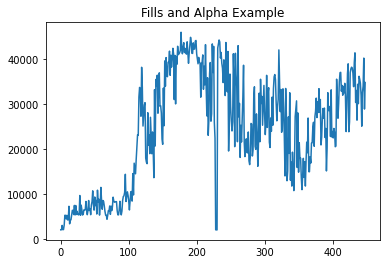

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

"""
Lendo de um arquivo de texto
"""
with open(path3, 'r') as f:
    # Usando a expressão regular para o separador indicando que eles são os
    # espaços em braco
    df = pd.read_table(f, sep='\s+')
    # print(df)
    ab = [x for x in range(len(df))]
    plt.plot(ab, df, '-')

    plt.title("Fills and Alpha Example")
    plt.show()